### Чернышова Дана Кирилловна
#### Задание 1


In [1]:
import random
import time
import matplotlib.pyplot as plt
import math

In [2]:
LEN = 2000
STEP = 5
X = 1.5 #for poly eval

In [7]:
def f_const() -> int:
    return 0

def f_sum(v: list[int]) -> int:
    res = 0
    for e in v:
        res += e
    return res

def f_mul(v: list[int]) -> int:
    return math.prod(v)

def direct_poly_eval(v: list[int], x: float):
    try:
        return sum(v[i] * x ** i for i in range(len(v)))
    except OverflowError:
        return math.inf

def horner_poly_eval(v: list[int], x: float):
    p_horner = v[-1]
    for coeff in v[-2::-1]:
        p_horner = coeff + x * p_horner
    return p_horner

def bubble_sort(v: list[int]) -> list[int]:
    n = len(v)
    for i in range(n):
        for j in range(0, n - i - 1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

def quick_sort(v: list[int]) -> list[int]:
    if len(v) <= 1:
        return v
    pivot = v[len(v) // 2]
    left = [x for x in v if x < pivot]
    middle = [x for x in v if x == pivot]
    right = [x for x in v if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# sort small chunks of the array
def insertion_sort(arr: list[int], left: int, right: int):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def timsort(v: list[int]):
    min_run = 32
    n = len(v)

    #sort individual subarrays of size min_run
    for i in range(0, n, min_run):
        insertion_sort(v, i, min(i + min_run - 1, n - 1))

    #merge sorted subarrays
    size = min_run
    while size < n:
        for left in range(0, n, size * 2):
            mid = min(left + size - 1, n - 1)
            right = min(left + size * 2 - 1, n - 1)
            if mid < right:
                v[left:right + 1] = sorted(v[left:right + 1])
        size *= 2
        
def mul_matrices(m1, m2):
    m3 = [[0] * len(m1) for _ in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m1)):
            for k in range(len(m1)):
                m3[i][j] += m1[i][k] * m2[k][j]
    return m3

In [4]:
def calc_time(func, *args) -> float:
    start = time.perf_counter()
    func(*args)
    return time.perf_counter() - start

In [8]:
const_timestamps = []
sum_timestamps = []
mul_timestamps = []
for length in range(1, LEN, STEP):
    vec = [random.randint(1, 100) for _ in range(length)]
    const_timestamps.append(calc_time(f_const))
    sum_timestamps.append(calc_time(f_sum, vec))
    mul_timestamps.append(calc_time(f_mul, vec))

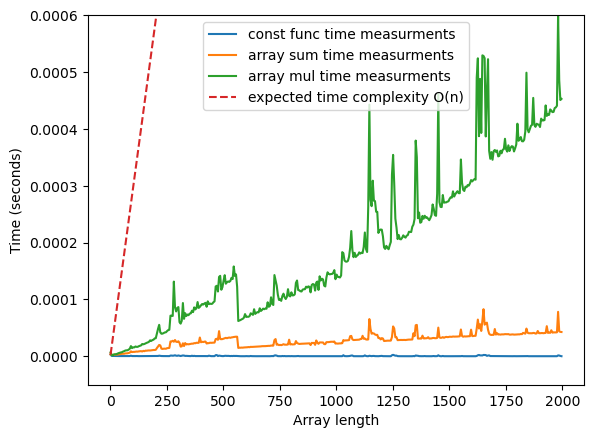

In [11]:
scale = const_timestamps[0]
plt.ylim(-0.00005, 0.0006)
plt.ylabel('Time (seconds)')
plt.xlabel('Array length')
plt.plot([i for i in range(1, LEN, STEP)],const_timestamps, label='const func time measurments')
plt.plot([i for i in range(1, LEN, STEP)],sum_timestamps, label='array sum time measurments')
plt.plot([i for i in range(1, LEN, STEP)],mul_timestamps, label='array mul time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[i*scale for i in range(1, LEN, STEP)], label='expected time complexity O(n)', linestyle='--')
plt.legend()

In [12]:
direct_poly_timestamps = []
horner_poly_timestamps = []
for length in range(1, LEN, STEP):
    vec = [random.randint(1, 10) for _ in range(length)]
    direct_poly_timestamps.append(calc_time(direct_poly_eval, vec, X))
    horner_poly_timestamps.append(calc_time(horner_poly_eval, vec, X))
    

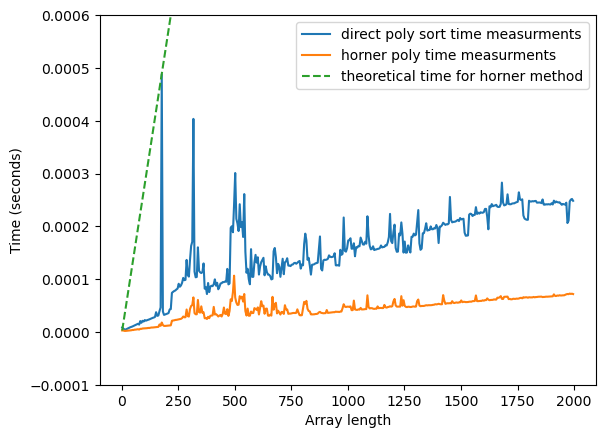

In [13]:
scale = horner_poly_timestamps[0]
plt.ylim(-0.0001, 0.0006)
plt.ylabel('Time (seconds)')
plt.xlabel('Array length')
plt.plot([i for i in range(1, LEN, STEP)],direct_poly_timestamps, label='direct poly sort time measurments')
plt.plot([i for i in range(1, LEN, STEP)],horner_poly_timestamps, label='horner poly time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[i*scale for i in range(1, LEN, STEP)], label='theoretical time for horner method', linestyle='--')
plt.legend()

In [14]:
bubble_sort_timestamps = []
for length in range(1, LEN, STEP):
    vec = [random.randint(1, 100) for _ in range(length)]
    bubble_sort_timestamps.append(calc_time(bubble_sort, vec))

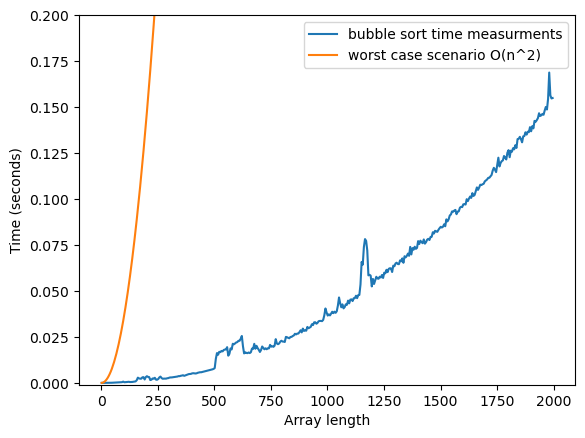

In [15]:
scale = bubble_sort_timestamps[0]
plt.ylim(-0.001, 0.2)
plt.ylabel('Time (seconds)')
plt.xlabel('Array length')
plt.plot([i for i in range(1, LEN, STEP)],bubble_sort_timestamps, label='bubble sort time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[i*i*scale for i in range(1, LEN, STEP)], label='worst case scenario O(n^2)')
plt.legend()

In [16]:
quick_sort_timestamps = []
for length in range(1, LEN, STEP):
    vec = [random.randint(1, 100) for _ in range(length)]
    quick_sort_timestamps.append(calc_time(quick_sort, vec))

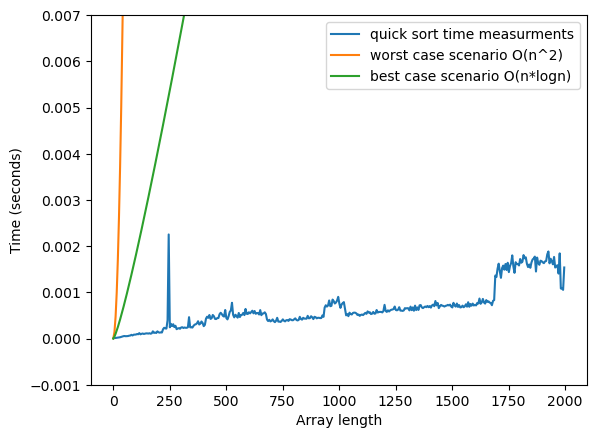

In [17]:
scale = quick_sort_timestamps[0]
plt.ylim(-0.001, 0.007)
plt.ylabel('Time (seconds)')
plt.xlabel('Array length')
plt.plot([i for i in range(1, LEN, STEP)],quick_sort_timestamps, label='quick sort time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[i*i*scale for i in range(1, LEN, STEP)], label='worst case scenario O(n^2)')
plt.plot([i for i in range(1, LEN, STEP)],[i*math.log(i)*scale for i in range(1, LEN, STEP)], label='best case scenario O(n*logn)')
plt.legend()

In [18]:
timsort_timestamps = []
for length in range(1, LEN, STEP):
    vec = [random.randint(1, 100) for _ in range(length)]
    timsort_timestamps.append(calc_time(timsort, vec))

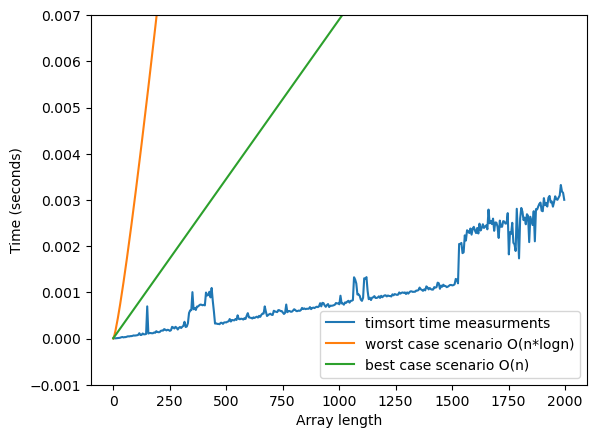

In [19]:
# graw plots for timsort
scale = timsort_timestamps[0]
plt.ylim(-0.001, 0.007)
plt.ylabel('Time (seconds)')
plt.xlabel('Array length')
plt.plot([i for i in range(1, LEN, STEP)],timsort_timestamps, label='timsort time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[i*math.log(i)*scale for i in range(1, LEN, STEP)], label='worst case scenario O(n*logn)')
plt.plot([i for i in range(1, LEN, STEP)],[i*scale for i in range(1, LEN, STEP)], label='best case scenario O(n)')
plt.legend()

In [22]:
STEP = 100 #otherwise eval is too long
LEN = 1300
matrix_mul_timestamps = []
for length in range(1, LEN, STEP):
    m1 = [[random.randint(1, 100) for _ in range(length)] for _ in range(length)]
    m2 = [[random.randint(1, 100) for _ in range(length)] for _ in range(length)]
    start_time = time.perf_counter()
    mul_matrices(m1, m2)
    end_time = time.perf_counter()
    matrix_mul_timestamps.append(end_time - start_time)
    print(length) #progress


1
101
201
301
401
501
601
701
801
901
1001
1101
1201


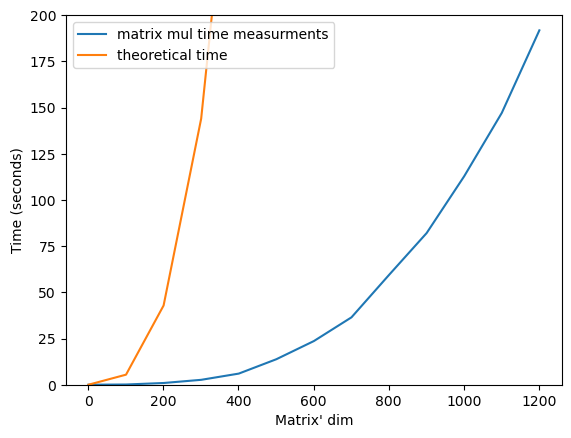

In [27]:
# graw plots for matrix multiplication
scale = matrix_mul_timestamps[0]
plt.ylim(-0.001, 200)
plt.ylabel('Time (seconds)')
plt.xlabel('Matrix\' dim')
plt.plot([i for i in range(1, LEN, STEP)],matrix_mul_timestamps, label='matrix mul time measurments')
plt.plot([i for i in range(1, LEN, STEP)],[(i**3)*scale for i in range(1, LEN, STEP)], label='theoretical time')
plt.legend()